In [56]:
%matplotlib inline

# for plotting images + graphs
import matplotlib.pyplot as plt

# OpenCV for reading image files from disk + converting color formats
import cv2
import os

In [57]:
healthy_path = '../data/raw/healthy_eye'
infected_path = '../data/raw/infected_eye'

In [58]:
# lists all the files in each folder
# slices the first five

healthy_imgs = os.listdir(healthy_path)[:5]
infected_imgs = os.listdir(infected_path)[:5]

print("healthy files: ", healthy_imgs)
print("infected files: ", infected_imgs)


healthy files:  ['63.jpg', '77.jpg', '162.jpg', '88.jpg', '172.jpeg']
infected files:  ['63.jpg', '77.jpg', '176.jpg', '88.jpg', '172.jpeg']


In [59]:
# make processed folders if they don’t exist

processed_healthy_path = '../data/processed/healthy_eye'
processed_infected_path = '../data/processed/infected_eye'

os.makedirs(processed_healthy_path, exist_ok=True)
os.makedirs(processed_infected_path, exist_ok=True)

In [60]:
def load_image_convert(img_path):

    # loads image
    img = cv2.imread(img_path)

    # opencv reads in bgr, but matplotlib needs rgb
    # so converts colors
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

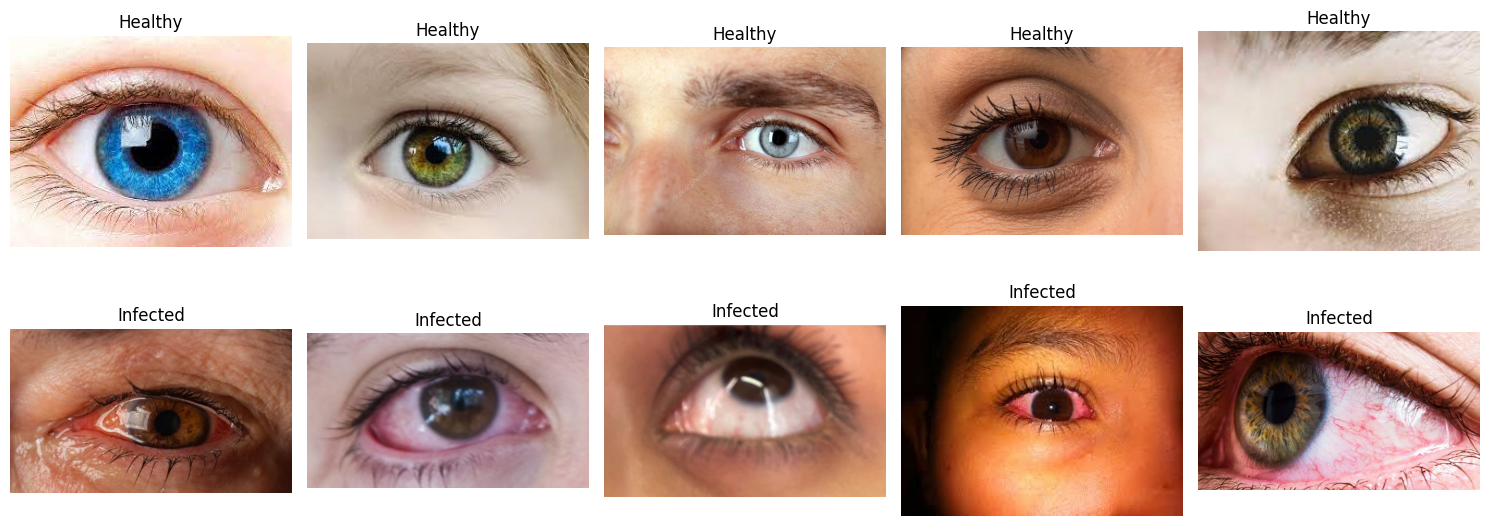

In [61]:
# makes a 2 row, 5 col grid of plots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, img_file in enumerate(healthy_imgs):
    img_rgb = load_image_convert(os.path.join(healthy_path, img_file))

    # shows the image
    axs[0, i].imshow(img_rgb)

    # makes title
    axs[0, i].set_title("Healthy")

    # no x/y ticks
    axs[0, i].axis('off')

for i, img_file in enumerate(infected_imgs):
    img_rgb = load_image_convert(os.path.join(infected_path, img_file))

    # shows the image
    axs[1, i].imshow(img_rgb)

    # makes title
    axs[1, i].set_title("Infected")

    # no x/y ticks
    axs[1, i].axis('off')

# remove overlap bw graphs
plt.tight_layout()

plt.show()

In [62]:
# loads a sample of each
healthy_sample = cv2.imread(os.path.join(healthy_path, healthy_imgs[0]))
infected_sample = cv2.imread(os.path.join(infected_path, infected_imgs[0]))

In [63]:
# inspect their shapes
print("Healthy image sample shape:", healthy_sample.shape)
print("Infected image sample shape:", infected_sample.shape)

Healthy image sample shape: (194, 259, 3)
Infected image sample shape: (648, 1111, 3)


In [64]:
# tqdm makes progress bar
from tqdm import tqdm

def clean_resize_imgs(input_path, output_path, label):

    # lists all filed in input_path dir
    # wraps list in progress bar and adds description label
    for file in tqdm(os.listdir(input_path), desc=f"{label} images"):
        img_path = os.path.join(input_path, file)

        try:
            # loads the image
            img = cv2.imread(img_path)

            # skip corrupt (unreadable or greyscale imgs)
            # cv2.imread returns None if cannot read file
            # if not 3D (height, width, channels) (greyscale would be 2d)
            # checks len is exactly 3 which is RGB/BGR only
            if img is None or len(img.shape) != 3 or img.shape[2] != 3:

                print(f"Skipped (corrupt or greyscale) {file}")
                continue

            # resize to standard size
            # can be changed later to optimize accuracy vs speed vs memory use
            resized_img = cv2.resize(img, (224, 224))

            # save to output folder
            # will overwrite existing files with same name without warning
            cv2.imwrite(os.path.join(output_path, file), resized_img)

        except Exception as e:
            print(f"Error processing {file}: {e}")



In [66]:
# clean healthy and infected imgs 
# write them to processed folder
clean_resize_imgs(healthy_path, processed_healthy_path, "Healthy")
clean_resize_imgs(infected_path, processed_infected_path, "Infected")

Infected images: 100%|██████████| 177/177 [00:00<00:00, 524.85it/s]
